In [129]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("mushroom-dataset/agaricus-lepiota.data")
data.head

<bound method NDFrame.head of      edibility cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            p         x           s         n       t    p               f   
1            e         x           s         y       t    a               f   
2            e         b           s         w       t    l               f   
3            p         x           y         w       t    p               f   
4            e         x           s         g       f    n               f   
...        ...       ...         ...       ...     ...  ...             ...   
8119         e         k           s         n       f    n               a   
8120         e         x           s         n       f    n               a   
8121         e         f           s         n       f    n               a   
8122         p         k           y         n       f    y               f   
8123         e         x           s         n       f    n               a   

     gill-spacing gil

In [2]:
print("Proportion of poisonous :", len(data[data['edibility'] == "p"]) / len(data), "%")
print("Proportion of edible :", len(data[data['edibility'] == "e"]) / len(data), "%")

Proportion of poisonous : 0.48202855736090594 %
Proportion of edible : 0.517971442639094 %


In [3]:
%%bash
ls mushroom-dataset
echo ""
head mushroom-dataset/agaricus-lepiota.data

agaricus-lepiota.data
agaricus-lepiota.names
expanded.Z
Index
index.html
README

edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,talk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g


<h1>New</h1>

<h2>Missing data percentages</h2>

In [134]:
data[data == "?"] = np.nan
print((data.isnull().sum()/len(data)*100).sort_values(ascending=False))

talk-root                   30.526834
stalk-shape                  0.000000
cap-shape                    0.000000
cap-surface                  0.000000
cap-color                    0.000000
bruises                      0.000000
odor                         0.000000
gill-attachment              0.000000
gill-spacing                 0.000000
gill-size                    0.000000
gill-color                   0.000000
habitat                      0.000000
population                   0.000000
stalk-surface-above-ring     0.000000
stalk-surface-below-ring     0.000000
stalk-color-above-ring       0.000000
stalk-color-below-ring       0.000000
veil-type                    0.000000
veil-color                   0.000000
ring-number                  0.000000
ring-type                    0.000000
spore-print-color            0.000000
edibility                    0.000000
dtype: float64


<h2>Dropping column with 30% missinig data</h2>

In [140]:
df01 = data.copy()
df02 = df01.drop(columns=["talk-root"])

<h2>Transforming categorical attributes into binary ones</h2>

In [142]:
from sklearn.preprocessing import OneHotEncoder

#print(data.head())
column_names = data.columns
categories = []

encoding = encoder.fit_transform(data)
df02 = pd.DataFrame(encoding.toarray())

<h2>Correlation Matrix</h2>

In [165]:
corr_matrix = df02.corr()

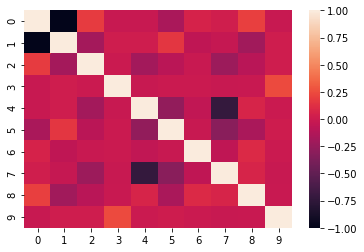

In [166]:
_, ax = plt.subplots()
sn.heatmap(corr_matrix.iloc[:10, :10], ax=ax);

<h2>PCA</h2>

In [167]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
viz = pca_model.fit_transform(df02)

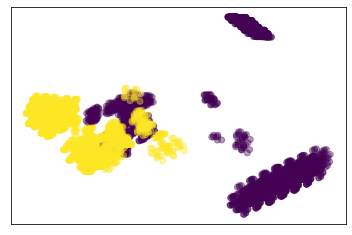

In [168]:
plt.scatter(viz[:,0], viz[:,1], alpha=0.4, c=df[0]);
plt.xticks([]);
plt.yticks([]);

<h2>Clustering for visualization</h2>

In [169]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []

for k in range(2, 20):
    model = KMeans(n_clusters=k).fit(df)
    inertias.append((k, model.inertia_))
    sil_scores.append((k, silhouette_score(df, model.labels_)))

<h2>Elbow Curve</h2>

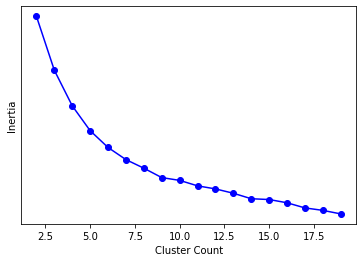

In [170]:
x, y = zip(*inertias)
plt.plot(x, y, "bo-")
plt.ylabel("Inertia")
plt.xlabel("Cluster Count")
plt.yticks([])
plt.show()

<h2>Silhouette Scores</h2>

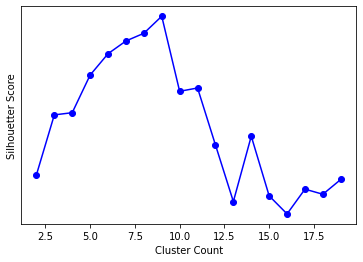

In [171]:
x, y = zip(*sil_scores)
plt.plot(x, y, "bo-")
plt.xlabel("Cluster Count")
plt.ylabel("Silhouetter Score")
plt.yticks([])
plt.show()